In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
import lightgbm
import catboost
#from sklearn.preprocessing import metrics

In [2]:
data = pd.read_csv('./Desktop/COVID19/usa_county_wise.csv')

In [3]:
data2 = pd.read_csv('./Desktop/COVID19/worldometer_data.csv')
data3 = pd.read_csv('./Desktop/COVID19/full_grouped.csv')
data4 = pd.read_csv('./Desktop/COVID19/day_wise.csv')
data5 = pd.read_csv('./Desktop/COVID19/covid_19_clean_complete.csv')
data6 = pd.read_csv('./Desktop/COVID19/country_wise_latest.csv')


In [4]:
data.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Date,Confirmed,Deaths
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271000,-170.132000,"American Samoa, US",1/22/20,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.444300,144.793700,"Guam, US",1/22/20,0,0
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.097900,145.673900,"Northern Mariana Islands, US",1/22/20,0,0
3,63072001,PR,PRI,630,72001.0,Adjuntas,Puerto Rico,US,18.180117,-66.754367,"Adjuntas, Puerto Rico, US",1/22/20,0,0
4,63072003,PR,PRI,630,72003.0,Aguada,Puerto Rico,US,18.360255,-67.175131,"Aguada, Puerto Rico, US",1/22/20,0,0


In [5]:
data2.head()

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa


In [6]:
data3.head()

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa


In [7]:
data4.head()

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
0,2020-01-22,555,17,28,510,0,0,0,3.06,5.05,60.71,6
1,2020-01-23,654,18,30,606,99,1,2,2.75,4.59,60.00,8
2,2020-01-24,941,26,36,879,287,8,6,2.76,3.83,72.22,9
3,2020-01-25,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11
4,2020-01-26,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13


In [8]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    188 non-null    object 
 1   Confirmed               188 non-null    int64  
 2   Deaths                  188 non-null    int64  
 3   Recovered               188 non-null    int64  
 4   Active                  188 non-null    int64  
 5   New cases               188 non-null    int64  
 6   New deaths              188 non-null    int64  
 7   New recovered           188 non-null    int64  
 8   Deaths / 100 Cases      188 non-null    float64
 9   Recovered / 100 Cases   188 non-null    float64
 10  Deaths / 100 Recovered  188 non-null    float64
 11  No. of countries        188 non-null    int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 17.8+ KB


In [9]:
data5.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [10]:
data6.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [11]:
data6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

In [12]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country/Region    209 non-null    object 
 1   Continent         208 non-null    object 
 2   Population        208 non-null    float64
 3   TotalCases        209 non-null    int64  
 4   NewCases          4 non-null      float64
 5   TotalDeaths       188 non-null    float64
 6   NewDeaths         3 non-null      float64
 7   TotalRecovered    205 non-null    float64
 8   NewRecovered      3 non-null      float64
 9   ActiveCases       205 non-null    float64
 10  Serious,Critical  122 non-null    float64
 11  Tot Cases/1M pop  208 non-null    float64
 12  Deaths/1M pop     187 non-null    float64
 13  TotalTests        191 non-null    float64
 14  Tests/1M pop      191 non-null    float64
 15  WHO Region        184 non-null    object 
dtypes: float64(12), int64(1), object(3)
memory u

In [13]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35156 entries, 0 to 35155
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            35156 non-null  object
 1   Country/Region  35156 non-null  object
 2   Confirmed       35156 non-null  int64 
 3   Deaths          35156 non-null  int64 
 4   Recovered       35156 non-null  int64 
 5   Active          35156 non-null  int64 
 6   New cases       35156 non-null  int64 
 7   New deaths      35156 non-null  int64 
 8   New recovered   35156 non-null  int64 
 9   WHO Region      35156 non-null  object
dtypes: int64(7), object(3)
memory usage: 2.7+ MB


In [14]:
data9 = pd.read_csv('./Videos/covid_19_data.csv')

In [15]:
data9.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [16]:
data9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SNo              306429 non-null  int64  
 1   ObservationDate  306429 non-null  object 
 2   Province/State   228329 non-null  object 
 3   Country/Region   306429 non-null  object 
 4   Last Update      306429 non-null  object 
 5   Confirmed        306429 non-null  float64
 6   Deaths           306429 non-null  float64
 7   Recovered        306429 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 18.7+ MB


In [17]:
data9['Deaths'].value_counts()

0.0        32417
1.0         9799
2.0         6921
3.0         6107
6.0         4153
           ...  
8778.0         1
14613.0        1
37619.0        1
13154.0        1
57889.0        1
Name: Deaths, Length: 20089, dtype: int64

In [18]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    188 non-null    object 
 1   Confirmed               188 non-null    int64  
 2   Deaths                  188 non-null    int64  
 3   Recovered               188 non-null    int64  
 4   Active                  188 non-null    int64  
 5   New cases               188 non-null    int64  
 6   New deaths              188 non-null    int64  
 7   New recovered           188 non-null    int64  
 8   Deaths / 100 Cases      188 non-null    float64
 9   Recovered / 100 Cases   188 non-null    float64
 10  Deaths / 100 Recovered  188 non-null    float64
 11  No. of countries        188 non-null    int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 17.8+ KB


In [19]:
data5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [20]:
data6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

In [21]:
data7 = pd.read_csv('./Desktop/COVID19/corona_tested_individuals_ver_006.english.csv')


C:\ProgramData\Anaconda4\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (1,2,3,4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [22]:
data7.head()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2020-04-30,0,0,0,0,0,negative,None,female,Other
1,2020-04-30,1,0,0,0,0,negative,None,female,Other
2,2020-04-30,0,1,0,0,0,negative,None,male,Other
3,2020-04-30,1,0,0,0,0,negative,None,female,Other
4,2020-04-30,1,0,0,0,0,negative,None,male,Other


In [23]:
data5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [24]:
data5.Deaths.unique()

array([     0,     17,      1, ...,   5630,  45759, 148011], dtype=int64)

In [25]:
data3.Deaths.unique()

array([     0,     17,     18, ...,   5630, 148011,  45844], dtype=int64)

In [26]:
data5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [27]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35156 entries, 0 to 35155
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            35156 non-null  object
 1   Country/Region  35156 non-null  object
 2   Confirmed       35156 non-null  int64 
 3   Deaths          35156 non-null  int64 
 4   Recovered       35156 non-null  int64 
 5   Active          35156 non-null  int64 
 6   New cases       35156 non-null  int64 
 7   New deaths      35156 non-null  int64 
 8   New recovered   35156 non-null  int64 
 9   WHO Region      35156 non-null  object
dtypes: int64(7), object(3)
memory usage: 2.7+ MB


In [28]:
data5.head(10)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa
5,NaN,Antigua and Barbuda,17.06080,-61.796400,2020-01-22,0,0,0,0,Americas
6,NaN,Argentina,-38.41610,-63.616700,2020-01-22,0,0,0,0,Americas
7,NaN,Armenia,40.06910,45.038200,2020-01-22,0,0,0,0,Europe
8,Australian Capital Territory,Australia,-35.47350,149.012400,2020-01-22,0,0,0,0,Western Pacific
9,New South Wales,Australia,-33.86880,151.209300,2020-01-22,0,0,0,0,Western Pacific


In [29]:
data3.head(10)

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa
5,2020-01-22,Antigua and Barbuda,0,0,0,0,0,0,0,Americas
6,2020-01-22,Argentina,0,0,0,0,0,0,0,Americas
7,2020-01-22,Armenia,0,0,0,0,0,0,0,Europe
8,2020-01-22,Australia,0,0,0,0,0,0,0,Western Pacific
9,2020-01-22,Austria,0,0,0,0,0,0,0,Europe


In [30]:
data5.drop_duplicates(inplace=True)

In [31]:
data5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 4.1+ MB


In [32]:
data3.drop_duplicates(inplace=True)

In [33]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35156 entries, 0 to 35155
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            35156 non-null  object
 1   Country/Region  35156 non-null  object
 2   Confirmed       35156 non-null  int64 
 3   Deaths          35156 non-null  int64 
 4   Recovered       35156 non-null  int64 
 5   Active          35156 non-null  int64 
 6   New cases       35156 non-null  int64 
 7   New deaths      35156 non-null  int64 
 8   New recovered   35156 non-null  int64 
 9   WHO Region      35156 non-null  object
dtypes: int64(7), object(3)
memory usage: 3.0+ MB


In [34]:
final_data = pd.merge(data5,data3,how='inner',on=['Country/Region','Recovered','Deaths','Active','Confirmed','WHO Region'])

In [35]:
final_data.head()

,Province/State,Country/Region,Lat,Long,Date_x,Confirmed,Deaths,Recovered,Active,WHO Region,Date_y,New cases,New deaths,New recovered
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean,2020-01-22,0,0,0
1,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean,2020-01-23,0,0,0
2,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean,2020-01-24,0,0,0
3,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean,2020-01-25,0,0,0
4,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean,2020-01-26,0,0,0


In [36]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 542314 entries, 0 to 542313
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Province/State  25869 non-null   object 
 1   Country/Region  542314 non-null  object 
 2   Lat             542314 non-null  float64
 3   Long            542314 non-null  float64
 4   Date_x          542314 non-null  object 
 5   Confirmed       542314 non-null  int64  
 6   Deaths          542314 non-null  int64  
 7   Recovered       542314 non-null  int64  
 8   Active          542314 non-null  int64  
 9   WHO Region      542314 non-null  object 
 10  Date_y          542314 non-null  object 
 11  New cases       542314 non-null  int64  
 12  New deaths      542314 non-null  int64  
 13  New recovered   542314 non-null  int64  
dtypes: float64(2), int64(7), object(5)
memory usage: 62.1+ MB


In [37]:
final_data.drop('Province/State',inplace=True,axis=1)

In [38]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 542314 entries, 0 to 542313
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country/Region  542314 non-null  object 
 1   Lat             542314 non-null  float64
 2   Long            542314 non-null  float64
 3   Date_x          542314 non-null  object 
 4   Confirmed       542314 non-null  int64  
 5   Deaths          542314 non-null  int64  
 6   Recovered       542314 non-null  int64  
 7   Active          542314 non-null  int64  
 8   WHO Region      542314 non-null  object 
 9   Date_y          542314 non-null  object 
 10  New cases       542314 non-null  int64  
 11  New deaths      542314 non-null  int64  
 12  New recovered   542314 non-null  int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 57.9+ MB


In [39]:
final_data['Country/Region'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'Colombia',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Greenland', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala',
       'Guinea', 'Guyana', 'Haiti', 'Holy See', 'Honduras', 'Hungary',
       'Iceland', 'India', 'Indonesia', 

In [40]:
final_data['Date_x'].value_counts()

2020-02-17    8483
2020-02-16    8481
2020-02-13    8481
2020-02-18    8480
2020-02-15    8478
              ... 
2020-05-03     685
2020-05-02     677
2020-07-27     662
2020-05-01     643
2020-04-30     632
Name: Date_x, Length: 188, dtype: int64

In [41]:
final_data['Date_x'].nunique()

188

In [42]:
final_data['Date_y'].nunique()

188

In [43]:
final_data['Date_y'].value_counts()

2020-01-23    10059
2020-01-22    10051
2020-01-25     9589
2020-01-24     9560
2020-01-27     8931
              ...  
2020-05-03      680
2020-05-02      672
2020-07-27      659
2020-05-01      638
2020-04-30      627
Name: Date_y, Length: 188, dtype: int64

In [44]:
final_data['Date'] = pd.to_datetime(final_data['Date_x'] + ' 2020')


In [45]:
final_data.head()

,Country/Region,Lat,Long,Date_x,Confirmed,Deaths,Recovered,Active,WHO Region,Date_y,New cases,New deaths,New recovered,Date
0,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean,2020-01-22,0,0,0,2020-01-22 20:20:00
1,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean,2020-01-23,0,0,0,2020-01-22 20:20:00
2,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean,2020-01-24,0,0,0,2020-01-22 20:20:00
3,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean,2020-01-25,0,0,0,2020-01-22 20:20:00
4,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean,2020-01-26,0,0,0,2020-01-22 20:20:00


In [46]:
final_data.drop('Date',axis=1,inplace=True)

In [47]:
final_data['Date_x'] = pd.to_datetime(final_data['Date_x'])
final_data['Date_y'] = pd.to_datetime(final_data['Date_y'])


In [48]:
final_data.head()

,Country/Region,Lat,Long,Date_x,Confirmed,Deaths,Recovered,Active,WHO Region,Date_y,New cases,New deaths,New recovered
0,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean,2020-01-22,0,0,0
1,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean,2020-01-23,0,0,0
2,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean,2020-01-24,0,0,0
3,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean,2020-01-25,0,0,0
4,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean,2020-01-26,0,0,0


In [49]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [50]:
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)

In [51]:
# color pallette
cnf = '#393e46' # confirmed - grey
dth = '#ff2e63' # death - red
rec = '#21bf73' # recovered - cyan
act = '#fe9801' # active case - yellow

In [52]:
def plot_daily(col, hue):
    fig = px.bar(final_data, x="Date_x", y=col, title=col, 
                 color_discrete_sequence=[hue])
    fig.update_layout(title=col, xaxis_title="", yaxis_title="")
    fig.show()

In [53]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 542314 entries, 0 to 542313
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Country/Region  542314 non-null  object        
 1   Lat             542314 non-null  float64       
 2   Long            542314 non-null  float64       
 3   Date_x          542314 non-null  datetime64[ns]
 4   Confirmed       542314 non-null  int64         
 5   Deaths          542314 non-null  int64         
 6   Recovered       542314 non-null  int64         
 7   Active          542314 non-null  int64         
 8   WHO Region      542314 non-null  object        
 9   Date_y          542314 non-null  datetime64[ns]
 10  New cases       542314 non-null  int64         
 11  New deaths      542314 non-null  int64         
 12  New recovered   542314 non-null  int64         
dtypes: datetime64[ns](2), float64(2), int64(7), object(2)
memory usage: 57.9+ MB


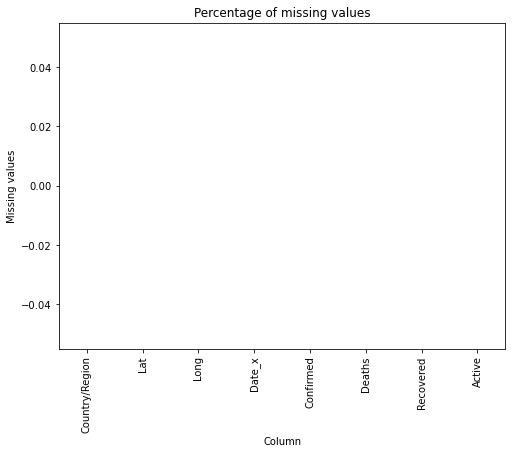

In [54]:
final_data.isna().mean().round(4).sort_values(ascending = False)[:8].plot(kind = 'bar', figsize = (8, 6), color = 'purple')
plt.title('Percentage of missing values')
plt.ylabel('Missing values')
plt.xlabel('Column')
plt.show()

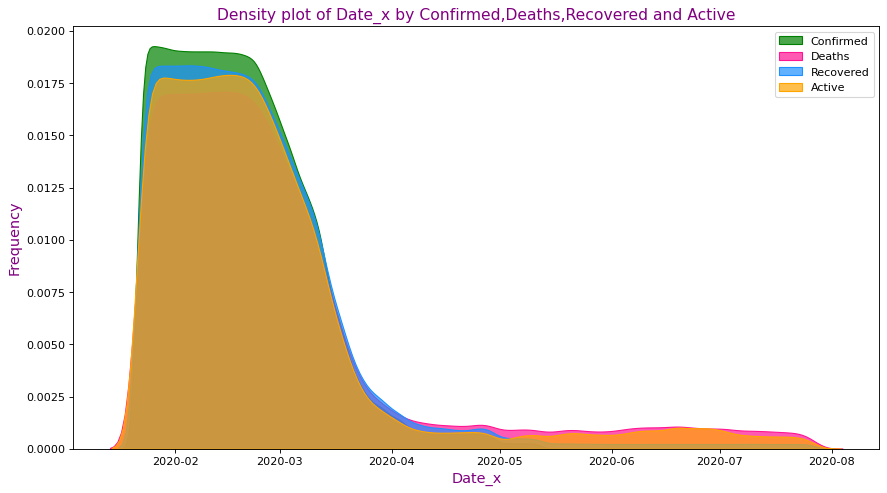

In [55]:
plt.figure(figsize=(13,7), dpi= 80)
sns.kdeplot(final_data.loc[final_data['Confirmed'] == 0, "Date_x"], shade=True, color="g", label="Confirmed", alpha=.7)
sns.kdeplot(final_data.loc[final_data['Deaths'] == 0, "Date_x"], shade=True, color="deeppink", label="Deaths", alpha=.7)
sns.kdeplot(final_data.loc[final_data['Recovered'] == 0, "Date_x"], shade=True, color="dodgerblue", label="Recovered", alpha=.7)
sns.kdeplot(final_data.loc[final_data['Active'] == 0, "Date_x"], shade=True, color="orange", label="Active", alpha=.7)
plt.title('Density plot of Date_x by Confirmed,Deaths,Recovered and Active', fontsize=14, color = 'purple')
plt.xlabel('Date_x', fontsize = 13, color = 'purple')
plt.ylabel('Frequency', color = 'purple', fontsize = 13)
plt.legend()
plt.show()

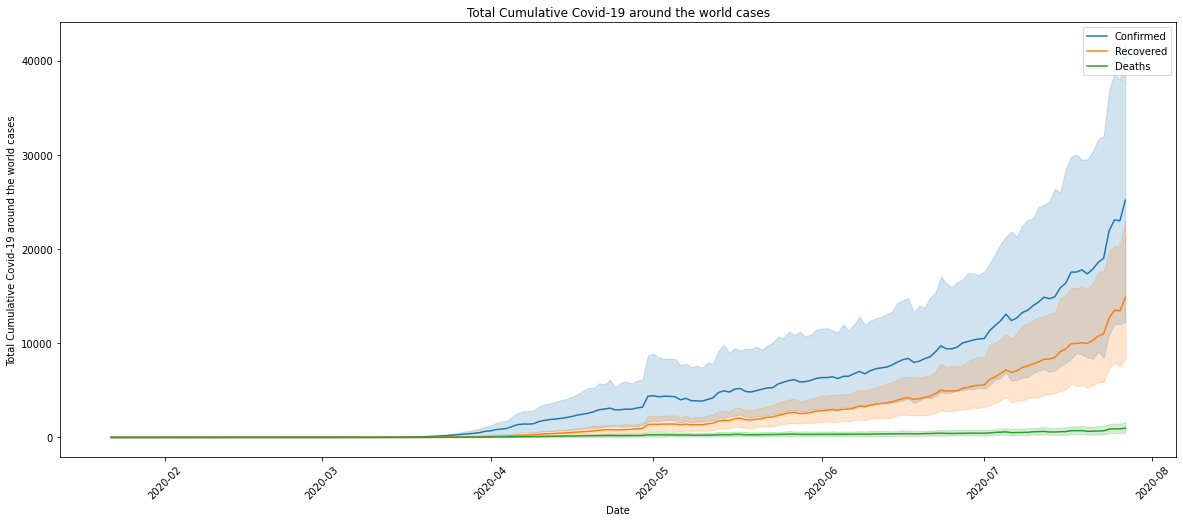

In [56]:
title = "Covid-19 around the world"
def lineplot(data, cols):
    """
    Line plot a list of variables with respect to date
    """
    f, ax = plt.subplots(1,1, figsize=(20, 8))
    for col in cols:
            g = sns.lineplot(x="Date_x", y=col, data=data, label=col)
    plt.xlabel('Date')
    plt.ylabel(f'Total Cumulative {title} cases')
    plt.title(f'Total Cumulative {title} cases')
    plt.xticks(rotation=45)
    plt.show();

lineplot(final_data, ['Confirmed', 'Recovered', 'Deaths'])

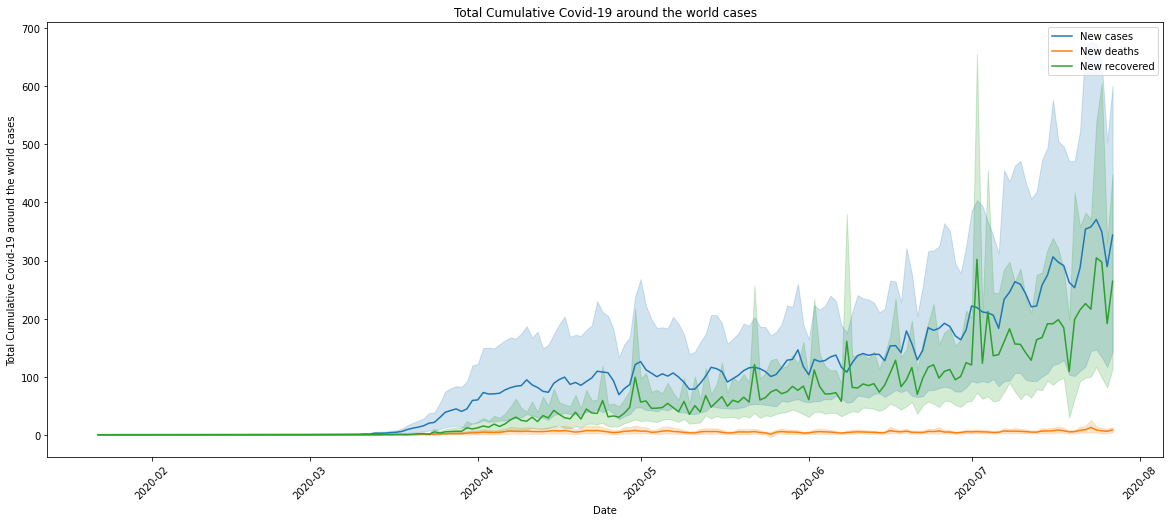

In [57]:
lineplot(final_data, ['New cases', 'New deaths', 'New recovered'])

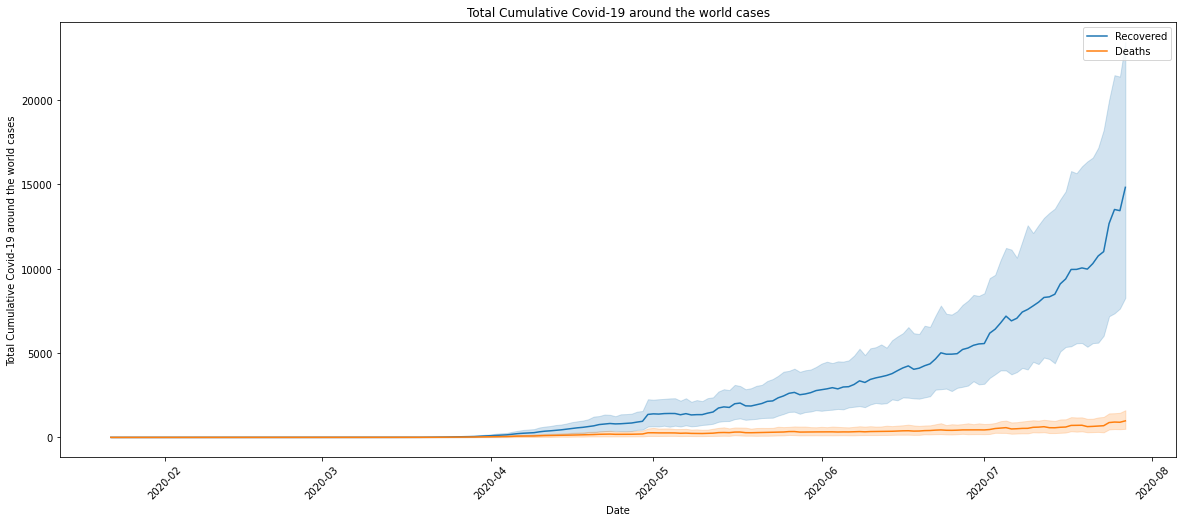

In [58]:
lineplot(final_data, ['Recovered', 'Deaths'])

In [59]:
## Todays histogram of cases by region
def plot_cases_by_region(DATE):
    dictionary = data[data.Date == DATE].to_dict(orient='records')[0]

    # Remove non-region keys
    entriesToRemove = ['Date_x', 'Confirmed', 'Active', 'Deaths', 'Recovered']
    for k in entriesToRemove:
        dictionary.pop(k, None)

    ## Histogram of total cases by region
    ax = pd.Series(dictionary).plot(kind='bar', figsize=(20,8), title=f"Total Cases by region {DATE}")
    ax.set_xlabel("Region")
    ax.set_ylabel("Total Cases")
    plt.xticks(rotation=45)
    plt.grid()
    plt.show();

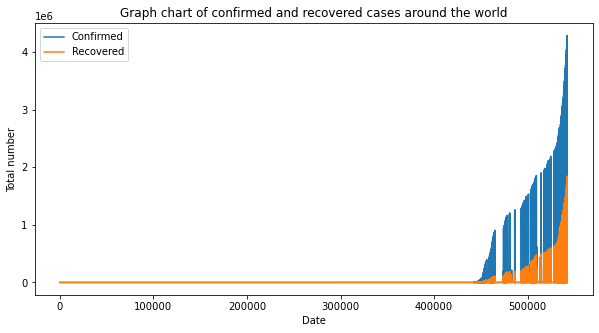

In [60]:
plt.figure(figsize=(10,5))
sns.lineplot(data = final_data['Confirmed'],label='Confirmed')
sns.lineplot(data = final_data['Recovered'],label='Recovered')
plt.xlabel('Date')
plt.ylabel('Total number')
plt.title('Graph chart of confirmed and recovered cases around the world')

plt.legend()

In [61]:
#mortality_rate = 100*total_Deaths/total_Confirmed

In [62]:
final_data.head(10)

,Country/Region,Lat,Long,Date_x,Confirmed,Deaths,Recovered,Active,WHO Region,Date_y,New cases,New deaths,New recovered
0,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean,2020-01-22,0,0,0
1,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean,2020-01-23,0,0,0
2,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean,2020-01-24,0,0,0
3,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean,2020-01-25,0,0,0
4,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean,2020-01-26,0,0,0
5,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean,2020-01-27,0,0,0
6,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean,2020-01-28,0,0,0
7,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean,2020-01-29,0,0,0
8,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean,2020-01-30,0,0,0
9,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean,2020-01-31,0,0,0


In [63]:
final_data.drop('Date_x',axis=1,inplace=True)

In [64]:
final_data['Confirmed'].value_counts()

0        431585
1         10128
24         9253
509        6568
11         5266
          ...  
6872          1
25303         1
19154         1
23248         1
37097         1
Name: Confirmed, Length: 9897, dtype: int64

In [65]:
final_data['Deaths'].value_counts()

0       494052
1        10255
21        6787
3         3712
2         2651
         ...  
5828         1
6340         1
8899         1
5829         1
1023         1
Name: Deaths, Length: 3136, dtype: int64

In [66]:
final_data['New deaths'].value_counts()

0       531262
1         2602
2         1269
3          817
4          621
         ...  
1109         1
756          1
244          1
243          1
1039         1
Name: New deaths, Length: 641, dtype: int64

In [67]:
final_data['Recovered'] = final_data['Recovered'].replace(to_replace=0, method='bfill')

In [68]:
final_data['Deaths'] = final_data['Deaths'].replace(to_replace=0, method='bfill')

In [69]:
final_data['Confirmed'] = final_data['Confirmed'].replace(to_replace=0, method='bfill')

In [70]:
final_data.head()

,Country/Region,Lat,Long,Confirmed,Deaths,Recovered,Active,WHO Region,Date_y,New cases,New deaths,New recovered
0,Afghanistan,33.93911,67.709953,2,1,1,0,Eastern Mediterranean,2020-01-22,0,0,0
1,Afghanistan,33.93911,67.709953,2,1,1,0,Eastern Mediterranean,2020-01-23,0,0,0
2,Afghanistan,33.93911,67.709953,2,1,1,0,Eastern Mediterranean,2020-01-24,0,0,0
3,Afghanistan,33.93911,67.709953,2,1,1,0,Eastern Mediterranean,2020-01-25,0,0,0
4,Afghanistan,33.93911,67.709953,2,1,1,0,Eastern Mediterranean,2020-01-26,0,0,0


In [71]:
final_data['Active'] = final_data['Active'].replace(to_replace=0, method='bfill')
final_data['New deaths'] = final_data['New deaths'].replace(to_replace=0, method='bfill')
final_data['New cases'] = final_data['New cases'].replace(to_replace=0, method='bfill')
final_data['New recovered'] = final_data['New recovered'].replace(to_replace=0, method='bfill')

In [72]:
final_data.head()

,Country/Region,Lat,Long,Confirmed,Deaths,Recovered,Active,WHO Region,Date_y,New cases,New deaths,New recovered
0,Afghanistan,33.93911,67.709953,2,1,1,2,Eastern Mediterranean,2020-01-22,1,1,1
1,Afghanistan,33.93911,67.709953,2,1,1,2,Eastern Mediterranean,2020-01-23,1,1,1
2,Afghanistan,33.93911,67.709953,2,1,1,2,Eastern Mediterranean,2020-01-24,1,1,1
3,Afghanistan,33.93911,67.709953,2,1,1,2,Eastern Mediterranean,2020-01-25,1,1,1
4,Afghanistan,33.93911,67.709953,2,1,1,2,Eastern Mediterranean,2020-01-26,1,1,1


In [73]:
final_data['mortality_rate'] = (final_data['Deaths'])/final_data['Confirmed']

In [74]:
final_data.head()

,Country/Region,Lat,Long,Confirmed,Deaths,Recovered,Active,WHO Region,Date_y,New cases,New deaths,New recovered,mortality_rate
0,Afghanistan,33.93911,67.709953,2,1,1,2,Eastern Mediterranean,2020-01-22,1,1,1,0.5
1,Afghanistan,33.93911,67.709953,2,1,1,2,Eastern Mediterranean,2020-01-23,1,1,1,0.5
2,Afghanistan,33.93911,67.709953,2,1,1,2,Eastern Mediterranean,2020-01-24,1,1,1,0.5
3,Afghanistan,33.93911,67.709953,2,1,1,2,Eastern Mediterranean,2020-01-25,1,1,1,0.5
4,Afghanistan,33.93911,67.709953,2,1,1,2,Eastern Mediterranean,2020-01-26,1,1,1,0.5


In [75]:
final_data['mortality_rate'].value_counts()

1.000000    285066
0.500000    154859
0.083333      9405
0.041257      6561
2.000000      5243
             ...  
0.002192         1
0.020569         1
0.102948         1
0.051073         1
0.056977         1
Name: mortality_rate, Length: 14949, dtype: int64

In [76]:
final_data['mortality_rate'].unique()

array([0.5       , 1.        , 0.33333333, ..., 0.01618497, 0.2856298 ,
       0.00829302])

In [77]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 542314 entries, 0 to 542313
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Country/Region  542314 non-null  object        
 1   Lat             542314 non-null  float64       
 2   Long            542314 non-null  float64       
 3   Confirmed       542314 non-null  int64         
 4   Deaths          542314 non-null  int64         
 5   Recovered       542314 non-null  int64         
 6   Active          542314 non-null  int64         
 7   WHO Region      542314 non-null  object        
 8   Date_y          542314 non-null  datetime64[ns]
 9   New cases       542314 non-null  int64         
 10  New deaths      542314 non-null  int64         
 11  New recovered   542314 non-null  int64         
 12  mortality_rate  542314 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(7), object(2)
memory usage: 57.9+ MB


In [78]:
final_data['mortality_rate'].fillna(0,inplace=True)

In [79]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 542314 entries, 0 to 542313
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Country/Region  542314 non-null  object        
 1   Lat             542314 non-null  float64       
 2   Long            542314 non-null  float64       
 3   Confirmed       542314 non-null  int64         
 4   Deaths          542314 non-null  int64         
 5   Recovered       542314 non-null  int64         
 6   Active          542314 non-null  int64         
 7   WHO Region      542314 non-null  object        
 8   Date_y          542314 non-null  datetime64[ns]
 9   New cases       542314 non-null  int64         
 10  New deaths      542314 non-null  int64         
 11  New recovered   542314 non-null  int64         
 12  mortality_rate  542314 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(7), object(2)
memory usage: 57.9+ MB


In [80]:
#data.fillna(value=0, inplace=True)

In [81]:
def plot_cases_by_region(DATE):
    dictionary = final_data[final_data.Date_y == DATE].to_dict(orient='records')[0]

    # Remove non-region keys
    entriesToRemove = ['Date_y', 'Long', 'Lat', 'Deaths', 'Active', 'Recovered', 'New cases','New deaths','New recovered','Confirmed']
    for k in entriesToRemove:
        dictionary.pop(k, None)

    ## Histogram of total cases by region
    ax = pd.Series(dictionary).plot(kind='bar', figsize=(20,8), title=f"Total Cases by region {DATE}")
    ax.set_xlabel("Region")
    ax.set_ylabel("Total Cases")
    plt.xticks(rotation=45)
    plt.grid()
    plt.show();

In [82]:
from datetime import date, datetime, timedelta


In [83]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 542314 entries, 0 to 542313
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Country/Region  542314 non-null  object        
 1   Lat             542314 non-null  float64       
 2   Long            542314 non-null  float64       
 3   Confirmed       542314 non-null  int64         
 4   Deaths          542314 non-null  int64         
 5   Recovered       542314 non-null  int64         
 6   Active          542314 non-null  int64         
 7   WHO Region      542314 non-null  object        
 8   Date_y          542314 non-null  datetime64[ns]
 9   New cases       542314 non-null  int64         
 10  New deaths      542314 non-null  int64         
 11  New recovered   542314 non-null  int64         
 12  mortality_rate  542314 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(7), object(2)
memory usage: 57.9+ MB


In [84]:
#final_data.drop('Province/State',axis=1,inplace=True)

In [85]:

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix, f1_score,classification_report

from sklearn.model_selection import GridSearchCV


from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import joblib

In [86]:
final_data.head()

,Country/Region,Lat,Long,Confirmed,Deaths,Recovered,Active,WHO Region,Date_y,New cases,New deaths,New recovered,mortality_rate
0,Afghanistan,33.93911,67.709953,2,1,1,2,Eastern Mediterranean,2020-01-22,1,1,1,0.5
1,Afghanistan,33.93911,67.709953,2,1,1,2,Eastern Mediterranean,2020-01-23,1,1,1,0.5
2,Afghanistan,33.93911,67.709953,2,1,1,2,Eastern Mediterranean,2020-01-24,1,1,1,0.5
3,Afghanistan,33.93911,67.709953,2,1,1,2,Eastern Mediterranean,2020-01-25,1,1,1,0.5
4,Afghanistan,33.93911,67.709953,2,1,1,2,Eastern Mediterranean,2020-01-26,1,1,1,0.5


In [87]:
final_data['WHO Region'].unique()

array(['Eastern Mediterranean', 'Europe', 'Africa', 'Americas',
       'Western Pacific', 'South-East Asia'], dtype=object)

In [88]:
final_data['year'] = final_data['Date_y'].dt.year
final_data['month'] = final_data['Date_y'].dt.month
final_data['day'] = final_data['Date_y'].dt.day



In [89]:
final_data['WHO Region'] = final_data['WHO Region'].map({'Eastern Mediterranean':0,'Europe':1,'Africa':2,'Americas':3,'Western Pacific':4,'South-East Asia':5})

In [90]:
final_data.head()

,Country/Region,Lat,Long,Confirmed,Deaths,Recovered,Active,WHO Region,Date_y,New cases,New deaths,New recovered,mortality_rate,year,month,day
0,Afghanistan,33.93911,67.709953,2,1,1,2,0,2020-01-22,1,1,1,0.5,2020,1,22
1,Afghanistan,33.93911,67.709953,2,1,1,2,0,2020-01-23,1,1,1,0.5,2020,1,23
2,Afghanistan,33.93911,67.709953,2,1,1,2,0,2020-01-24,1,1,1,0.5,2020,1,24
3,Afghanistan,33.93911,67.709953,2,1,1,2,0,2020-01-25,1,1,1,0.5,2020,1,25
4,Afghanistan,33.93911,67.709953,2,1,1,2,0,2020-01-26,1,1,1,0.5,2020,1,26


In [91]:
final_data.drop('Date_y',axis=1,inplace=True)

In [92]:
X = final_data.drop(['Country/Region','mortality_rate'], axis=1)
y = final_data['mortality_rate']

In [93]:
scaler = StandardScaler()
#X = scaler.fit_transform(X)

In [94]:
y

0         0.500000
1         0.500000
2         0.500000
3         0.500000
4         0.500000
            ...   
542309    0.027020
542310    0.019957
542311    0.016185
542312    0.285630
542313    0.008293
Name: mortality_rate, Length: 542314, dtype: float64

In [95]:
y.unique()

array([0.5       , 1.        , 0.33333333, ..., 0.01618497, 0.2856298 ,
       0.00829302])

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [97]:
from lightgbm import LGBMRegressor

In [98]:
lgb = LGBMRegressor()

In [99]:
lgb.fit(X_train,y_train)

LGBMRegressor()

In [100]:
pred = lgb.predict(X_test)

In [101]:
from sklearn.metrics import r2_score

In [102]:
r2_score(y_test,pred)

0.9952971967316958

In [103]:
from sklearn.metrics import mean_squared_error

In [104]:
np.sqrt(mean_squared_error(y_test,pred))

0.4737757559792061

In [105]:
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [106]:
xgb = XGBRegressor(n_estimators = 200,max_depth=7)
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=7, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=200, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [107]:
rf = RandomForestRegressor(max_depth=5)
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=5)

In [108]:
dt = DecisionTreeRegressor(max_depth=5)
dt.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5)

In [109]:
xgb_pred = xgb.predict(X_test)
rf_pred = rf.predict(X_test)
dt_pred = dt.predict(X_test)

In [110]:
r2_score(y_test,xgb_pred)

0.9996830390820238

In [111]:
r2_score(y_test,rf_pred)

0.9935932715643894

In [112]:
r2_score(y_test,dt_pred)

0.9904265785802379

In [121]:
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from catboost import CatBoostRegressor

In [124]:
import pickle

In [ ]:
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)

In [129]:
# save the model to disk
filename = 'rf.pkl'
pickle.dump(rf, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.9935932715643894


In [130]:
# save the model to disk
filename = 'dt.pkl'
pickle.dump(dt, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.9904265785802379


In [131]:
# save the model to disk
filename = 'xgb.pkl'
pickle.dump(xgb, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.9996830390820238


In [134]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold